# Constraints on the PBH abundance

Compute the forecasted bounds on the PBH abundance for several future experiments

In [1]:
from Source.flux_stuff import *
from Source.event_rate import *
from Source.chi2 import *
import matplotlib as mpl
mpl.rcParams.update({'font.size': 18})

# gamma ray PBH bound, from Carr et al 2020 (write elsewhere, and check if it is at 90 CL)
def boundgamma_DM(M):
    ep = 0.2
    return 2.e-8*(M/5e14)**(3+ep)

def boundgamma_evap(M):
    ep = 0.2
    return 3.e-27*(M/5e14)**(-5./2.-2.*ep)

# bound on beta', See Carr 2020 review
def boundcmb_ani(M):
    if M>=2.5e13 and M<= 2.4e14:
        return 3.e-30*(M/1e13)**(3.1)
    else:
        return None

boundcmb_ani = np.vectorize(boundcmb_ani)
    
def plot_pbh_bounds(Mpbhs, fpbhs, is_DM):

    exps = ["SK", "HK", "JUNO", "DUNE"]
    cols = ["b", "r", "orange", "g"]

    #exps = ["HK", "JUNO", "DUNE"]
    #cols = ["r", "orange", "g"]

    # Compute fluxes (comment if already computed)
    compute_flux(Mpbhs, fpbhs)  # fpbhs not used here actually

    fig, ax = plt.subplots(figsize=(9,6))

    # Compute the bound for each experiment considered
    for ie, exp in enumerate(exps):
        print(exp)

        # Compute event rate
        compute_events(Mpbhs, fpbhs, exp)  # fpbhs not used here actually

        chitab, fpbh_bounds = compute_chi2_2D_mod(Mpbhs, fpbhs, exp, is_DM)
        
        if is_DM:
            plt.plot(Mpbhs/1e15, fpbh_bounds, color=cols[ie],linestyle='-',linewidth=3, label=exps[ie])
        else:
            plt.plot(Mpbhs, fpbh_bounds, color=cols[ie],linestyle='-',linewidth=3, label=exps[ie])
       
    if is_DM:

        #mm, ff = np.loadtxt("Xenon_Limit_HighMasses.csv",delimiter=",",unpack=True)
        #plt.plot(mm/1e15, ff, color="y", linestyle="--", lw=4, label=r"DARWIN")
        #mm, ff = np.loadtxt("Argon_Limit_HighMasses.csv",delimiter=",",unpack=True)
        #plt.plot(mm/1e15, ff, color="y", linestyle=":", lw=4, label=r"ARGO")

        plt.plot(Mpbhs/1e15, boundgamma_DM(Mpbhs), color="m", linestyle="--", lw=4, label=r"$\gamma$ rays")
        
    else:
        plt.plot(Mpbhs, boundgamma_evap(Mpbhs), color="m", linestyle="--", lw=4, label=r"$\gamma$ rays")
        #plt.plot(Mpbhs, boundcmb_ani(Mpbhs), color="m", linestyle="--", lw=4, label=r"CMB")

        
    if is_DM:
        plt.ylabel(r'$  f_{\rm PBH} $')
        plt.xlabel(r'$ M_{\rm PBH} $'+' [$10^{15}$ g]')
        plt.xlim(Mpbhs[0]/1e15, Mpbhs[-1]/1e15)
        sufix = "DM"
    else:
        plt.ylabel(r"$  \beta' $")
        plt.xlabel(r'$ M_{\rm PBH} $'+' [g]')
        plt.xlim(Mpbhs[0], Mpbhs[-1])
        sufix = "evaporated"
        plt.xscale("log")

    plt.legend()#loc='lower right',frameon=False)
    plt.ylim(fpbhs[0], fpbhs[-1])
    plt.yscale("log")

    plt.tight_layout()
    plt.savefig("figures/PBH_bounds_"+sufix+".pdf", format='pdf')
    plt.show()


## Compute bounds on the abundance of PBHs as Dark Matter

Mass: 1.0e+15, z min: 0.0e+00
Mass: 1.5e+15, z min: 0.0e+00
Mass: 2.0e+15, z min: 0.0e+00
Mass: 2.5e+15, z min: 0.0e+00
Mass: 3.0e+15, z min: 0.0e+00
Mass: 3.5e+15, z min: 0.0e+00
Mass: 4.0e+15, z min: 0.0e+00
Mass: 4.5e+15, z min: 0.0e+00
Mass: 5.0e+15, z min: 0.0e+00
Mass: 5.5e+15, z min: 0.0e+00
Mass: 6.0e+15, z min: 0.0e+00
Mass: 6.5e+15, z min: 0.0e+00
Mass: 7.0e+15, z min: 0.0e+00
Mass: 7.5e+15, z min: 0.0e+00
Mass: 8.0e+15, z min: 0.0e+00
SK


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


HK


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


JUNO


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


DUNE


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


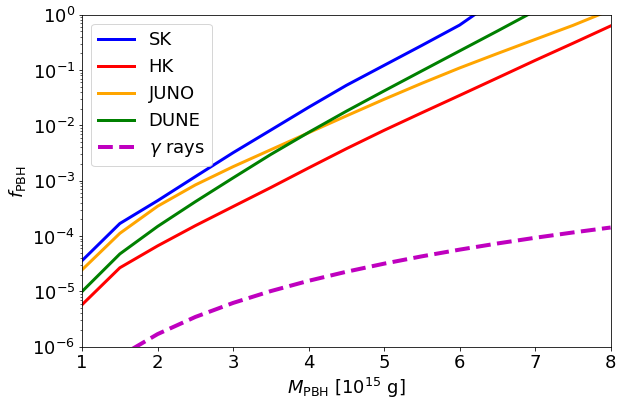

In [2]:
Mpbhs = np.linspace(1.e15, 8.e15, 15)
#Mpbhs = np.array([1.e15, 2.e15, 4.e15, 6.e15, 8.e15])
fpbhs = np.logspace(-6, 0, 20)

plot_pbh_bounds(Mpbhs, fpbhs, is_DM=True)

## Compute bounds on the primordial abundance of evaporated PBHs

Mass: 1.0e+11, z min: 7.8e+06
Mass: 1.0e+12, z min: 2.5e+05
Mass: 1.0e+13, z min: 7.8e+03
Mass: 1.0e+14, z min: 1.2e+02
SK


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


HK


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


JUNO


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


DUNE


/usr/local/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


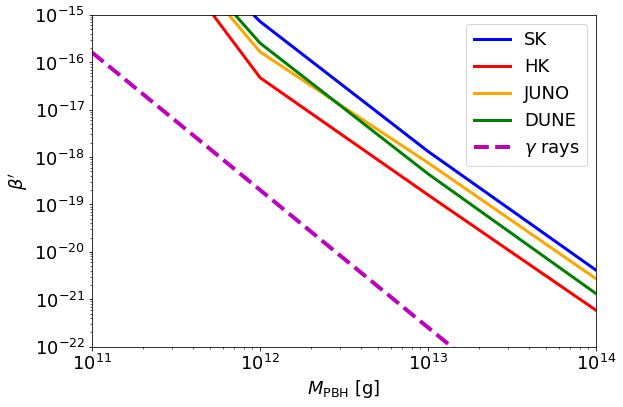

In [3]:
Mpbhs = np.array([1.e11, 1.e12, 1.e13, 1.e14])
betas = np.logspace(-22, -15, 20)

plot_pbh_bounds(Mpbhs, betas, is_DM=False)